Importamos las librerias a utilizar.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px

Primero cargamos la hoja que vamos a necesitar para realizar el EDA. Para esto creamos una variable donde reposara nuestro archivo de excel a utilizar, en este caso internet.

In [3]:
archivo_internet= '/Users/mr04/Desktop/P02/Para montar/Internet.xlsx'

Para el analisis no vamos a usar todas las hojas del excel, asi que las cargamos una a una para despues poderlas unir a traves de columnas en común.

In [4]:
accesos_por_tecnologia = pd.read_excel(archivo_internet, sheet_name='Accesos Por Tecnología')
velocidad_por_prov= pd.read_excel(archivo_internet, sheet_name='Velocidad % por prov')
penetracion_hogares= pd.read_excel(archivo_internet, sheet_name='Penetracion-hogares', dtype={'Accesos por cada 100':float})


Antes de realizar la unión de todas las tablas, verificaremos que cada hoja cuente con datos de calidad. <br>
Empezaremos con la hoja accesos_por_tecnologia, viendo que columnas tiene y que tipo de formato tienen. 

In [5]:
accesos_por_tecnologia.head(2)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0


Buscaremos si hay valores nulos dentro de la hoja 'accesos_por_tecnologia'.

In [6]:
print(accesos_por_tecnologia.isnull().sum())

Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64


Se muestra que si hay, entonces se toma una columna de las que tienen mas valores nulos, en este caso la columna 'Total' para ver cuales son sus indíces y si los otros valores nulos se encuentran en esas mismas filas. 

In [7]:
valores_nulos= accesos_por_tecnologia[accesos_por_tecnologia['Total'].isnull()].index
print(valores_nulos)

Index([1007, 1008], dtype='int64')


Vemos que los valores nulos se encuentran en los indices 1007 y 1008. Entonces revisamos todos los valores de esas filas para determinar si hay mas valores nulos dentro de ellas. 

In [8]:
accesos_por_tecnologia.iloc[1007]

Año             NaN
Trimestre       NaN
Provincia       NaN
ADSL            NaN
Cablemodem      NaN
Fibra óptica    NaN
Wireless        NaN
Otros           NaN
Total           NaN
Name: 1007, dtype: object

In [9]:
accesos_por_tecnologia.iloc[1008]

Año                                                             *
Trimestre       Los datos provinciales no coinciden a nivel na...
Provincia                                                     NaN
ADSL                                                          NaN
Cablemodem                                                    NaN
Fibra óptica                                                  NaN
Wireless                                                      NaN
Otros                                                         NaN
Total                                                         NaN
Name: 1008, dtype: object

Despues de revisar que contiene cada fila de valores nulos, nos damos cuenta de que no son necesarios para nuestro análisis, asi que las eliminamos. 

In [10]:
valores_nulos=[1007,1008]
accesos_por_tecnologia.drop(valores_nulos, inplace= True)

Ahora que ya no tenemos valores nulos, revisamos las demas columnas para ver que los datos estén en buena calidad.

In [11]:
años = []
for año in accesos_por_tecnologia['Año']:
    años.append(año)
    
años_originales = list(set(años))

print(años_originales)

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, '2019 *', 2014, 2015]


Encontramos un primer error en la columna 'Año' ya que al parecer se esta contando como una año adicional el '2019 *'.

In [12]:
trimestres = []
for trimestre in accesos_por_tecnologia['Trimestre']:
    trimestres.append(trimestre)
    
trimestres_originales = list(set(trimestres))

print(trimestres_originales)

[1, 2, 3, 4, '3 *', '1 *', '2 *']


Tambien podemos observar que un error parecido en la columna 'Trimestre' con los valores 1*,2* y 3*.

In [13]:
provincias = []
for provincia in accesos_por_tecnologia['Provincia']:
    provincias.append(provincia)

provincias_originales = list(set(provincias))

print(provincias_originales)

['Misiones', 'Capital Federal', 'Neuquén', 'Buenos Aires', 'San Juan', 'Mendoza', 'Salta', 'Santa Cruz', 'Tierra Del Fuego', 'Chaco', 'Catamarca', 'La Rioja', 'Formosa', 'San Luis', 'Jujuy', 'La Pampa', 'Río Negro', 'Corrientes', 'Chubut', 'Tucumán', 'Entre Ríos', 'Santiago Del Estero', 'Santa Fe', 'Córdoba']


En provincias no encontramos ningún error por lo que pasaremos a solucionar los valores erroneos de las columnas 'Año' y 'Trimestre'. Para ello primero revisaremos que tipo de dato son para evaluar mejor que transformaciones hacer en orden a corregir los valores con asteriscos. 

In [14]:
accesos_por_tecnologia.dtypes

Año              object
Trimestre        object
Provincia        object
ADSL            float64
Cablemodem      float64
Fibra óptica    float64
Wireless        float64
Otros           float64
Total           float64
dtype: object

Vemos que a'Año' es object pero por si acaso hacemos la conversión a texto para que unifique el tipo de dato en caso de no estarlo.

In [15]:
accesos_por_tecnologia['Año'] = accesos_por_tecnologia['Año'].astype(str)

Usamos replace para quitar los asteriscos de los años que lo contengan.

In [16]:
accesos_por_tecnologia['Año'] = accesos_por_tecnologia['Año'].str.replace('*', '', regex=False)

Pasamos los valores de 'Año' a números.

In [17]:
accesos_por_tecnologia['Año'] = accesos_por_tecnologia['Año'].astype(int)

Usamos unique para ver los valores únicos de la columna y ver si se ha solucionado el error del asterisco.

In [18]:
print(accesos_por_tecnologia['Año'].unique())

[2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


Ahora pasasmos a hacer los mismos pasos con la columna 'Trimestre'

In [19]:
accesos_por_tecnologia['Trimestre'] = accesos_por_tecnologia['Trimestre'].astype(str)

In [20]:
accesos_por_tecnologia['Trimestre'] = accesos_por_tecnologia['Trimestre'].str.replace('*', '', regex=False)

In [21]:
accesos_por_tecnologia['Trimestre'] = accesos_por_tecnologia['Trimestre'].astype(int)

Revisamoa que se hayan corregido los valores con asterisco.

In [22]:
print(accesos_por_tecnologia['Trimestre'].unique())

[2 1 4 3]


Listo, ya quedo lista la hoja de 'accesos_por_tecnologia', ahora pasamos a la siguiente para poder hacerles merge y volver todo una sola tabla. 

Al tomar la hoja 'velocidad_por_prov' pasamos a revisar que columnas tiene y que tipos de datos hay en cada una. 

In [23]:
velocidad_por_prov.head(2)

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,2,Buenos Aires,157.41
1,2024,2,Capital Federal,233.01


In [24]:
velocidad_por_prov.dtypes

Año                         int64
Trimestre                   int64
Provincia                  object
Mbps (Media de bajada)    float64
dtype: object

Revisamos si tiene valores nulos.

In [25]:
print(velocidad_por_prov.isnull().sum())

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64


Revisamos los años,trimestres y provincias que tiene para ver que concuerden con los datos de nuestra primera tabla.

In [26]:
años = []
for año in velocidad_por_prov['Año']:
    años.append(año)
    
años_originales = list(set(años))

print(años_originales)

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2014, 2015]


In [27]:
trimestres = []
for trimestre in velocidad_por_prov['Trimestre']:
    trimestres.append(trimestre)
    
trimestres_originales = list(set(trimestres))

print(trimestres_originales)

[1, 2, 3, 4]


In [28]:
provincias = []
for provincia in velocidad_por_prov['Provincia']:
    provincias.append(provincia)
    
provincias_originales = list(set(provincias))

print(provincias_originales)

['Misiones', 'Capital Federal', 'Neuquén', 'Buenos Aires', 'San Juan', 'Mendoza', 'Salta', 'Santa Cruz', 'Tierra Del Fuego', 'Chaco', 'Catamarca', 'La Rioja', 'Formosa', 'San Luis', 'Jujuy', 'La Pampa', 'Río Negro', 'Corrientes', 'Chubut', 'Tucumán', 'Entre Ríos', 'Santiago Del Estero', 'Santa Fe', 'Córdoba']


Al ver que concuerdan con nuestra primera hoja y en estos datos no se encuentra ninguno de los errores de la pagina anterior o nuevos, podemos hacer el merge entre ambas hojas. <br> 

Para finalizar revisamos que la columna de Mbps no tenga valores negativos. 

In [29]:
mbps_negativos = []
for mbps in velocidad_por_prov['Mbps (Media de bajada)']:
    if mbps < 0:
        mbps_negativos.append(mbps)
        
lista_mbps_negativos = list(set(mbps_negativos))

print(mbps_negativos)

[]


Al ver que todos los datos están en orden hacemos un merge de ambas hojas, tomando como filtros la provincia, el año y el trimestre.

In [30]:
tabla_uno= pd.merge(accesos_por_tecnologia, velocidad_por_prov, on=['Provincia', 'Año','Trimestre'], how='left')
tabla_uno

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Mbps (Media de bajada)
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0,157.410000
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0,233.010000
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0,97.380000
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0,107.760000
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0,21.670000
...,...,...,...,...,...,...,...,...,...,...
1002,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0,3.315991
1003,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0,3.147407
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0,2.949472
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0,3.446888


Revisamos nuevamente que durante el merge que se genero entre ambas hojas no se hayan creado valores nulos.

In [31]:
print(tabla_uno.isnull().sum())

Año                       0
Trimestre                 0
Provincia                 0
ADSL                      0
Cablemodem                0
Fibra óptica              0
Wireless                  0
Otros                     0
Total                     0
Mbps (Media de bajada)    0
dtype: int64


Al ver que no tenemos valores nulos, pasamos a la última página que integraremos junto con las dos anteriores. Comenzamos por ver que datos tiene y de que tipo son.

In [32]:
penetracion_hogares.head(2) 


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,2,Buenos Aires,79.84
1,2024,2,Capital Federal,116.37


In [33]:
penetracion_hogares.dtypes

Año                               int64
Trimestre                         int64
Provincia                        object
Accesos por cada 100 hogares    float64
dtype: object

Revisamos si hay valores nulos.

In [34]:
print(penetracion_hogares.isnull().sum())

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64


Al ver que no hay valores nulos, procedermos a agrupar esta hoja junto a la tabla anterior.

In [35]:
data_trimestral= pd.merge(tabla_uno, penetracion_hogares, on=['Provincia', 'Año','Trimestre'], how='left')
data_trimestral

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Mbps (Media de bajada),Accesos por cada 100 hogares
0,2024,2,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0,157.410000,79.84
1,2024,2,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0,233.010000,116.37
2,2024,2,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0,97.380000,68.81
3,2024,2,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0,107.760000,44.06
4,2024,2,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0,21.670000,86.33
...,...,...,...,...,...,...,...,...,...,...,...
1002,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0,3.315991,NaN
1003,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0,3.147407,NaN
1004,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0,2.949472,NaN
1005,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0,3.446888,NaN


Revisamos que no se hayan generado valores nulos al agrupar las tablas.

In [36]:
print(data_trimestral.isnull().sum())

Año                             0
Trimestre                       0
Provincia                       0
ADSL                            0
Cablemodem                      0
Fibra óptica                    0
Wireless                        0
Otros                           0
Total                           0
Mbps (Media de bajada)          0
Accesos por cada 100 hogares    8
dtype: int64


Vemos que se crearon 8 valores nulos en la columna 'Accesos por cada 100 hogares', lo cual era de esperarse pues al hacer el merge cuando no hay datos estos se rellenan con Nan.<br> 
Vamos a revisar en que filas se encuentran estos datos y convertirlos en 0 para no afectar los valores que hay en las otras columnas y se puedan perjudicar nuestros análisis. 

In [37]:
indices_valores_nulos = data_trimestral[data_trimestral.isnull().any(axis=1)].index
print(indices_valores_nulos )

Index([999, 1000, 1001, 1002, 1003, 1004, 1005, 1006], dtype='int64')


In [38]:
data_trimestral.loc[indices_valores_nulos] = data_trimestral.loc[indices_valores_nulos].fillna(0)

Revisamos con uno de los indices que se haya efectuado el cambio.

In [39]:
data_trimestral.iloc[999]

Año                                 2014
Trimestre                              1
Provincia                          Salta
ADSL                             73131.0
Cablemodem                       17538.0
Fibra óptica                        45.0
Wireless                             8.0
Otros                              568.0
Total                            91290.0
Mbps (Media de bajada)          3.300902
Accesos por cada 100 hogares         0.0
Name: 999, dtype: object

Buscamos nuevamente valores nulos.

In [40]:
print(data_trimestral.isnull().sum())

Año                             0
Trimestre                       0
Provincia                       0
ADSL                            0
Cablemodem                      0
Fibra óptica                    0
Wireless                        0
Otros                           0
Total                           0
Mbps (Media de bajada)          0
Accesos por cada 100 hogares    0
dtype: int64


Ahora que tenemos nuestro dataset completo, buscamos si se generaron duplicados durante los merge.

In [41]:
data_trimestral[data_trimestral.duplicated()]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Mbps (Media de bajada),Accesos por cada 100 hogares


Vemos que no hubo duplicados.<br> 
Para los análisis usaremos valores anuales, por lo que crearemos una tabla donde agruparemos los datos por 'Año' y 'Provincia'.

Creamos una copia del data_trimestral, la cual llamaremos data, para poder dejar data_trimestral en caso que debamos hacer un calculo con los trimestres. <br>
Lo primero que haremos será borrar la columna 'Trimestre' para poder agruparlos. 

In [42]:
data = data_trimestral.copy()
data.drop('Trimestre', axis=1, inplace=True)


Revisamos que se haya creado el dataset sin problemas y se haya eliminado la columna 'Trimestre'.

In [43]:
data.head()

,Año,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Mbps (Media de bajada),Accesos por cada 100 hogares
0,2024,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0,157.41,79.84
1,2024,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0,233.01,116.37
2,2024,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0,97.38,68.81
3,2024,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0,107.76,44.06
4,2024,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0,21.67,86.33


Agrupamos los datos por año y provincia y usamos la función .agg para poder especificar que calculo se hará con cada columna ya que nos interesa que se sumen todas, excepto Mbps de la cual necesitamos el promedio.

In [44]:
data = data.groupby(['Año', 'Provincia'], as_index=False).agg({
    'ADSL': 'sum',
    'Cablemodem': 'sum',
    'Fibra óptica': 'sum',
    'Wireless': 'sum',
    'Otros': 'sum',
    'Total': 'sum',
    'Mbps (Media de bajada)': 'mean',
    'Accesos por cada 100 hogares': 'sum'
})

Revisamos con que datos quedo nuestra tabla final.

In [45]:
data.dtypes

Año                               int64
Provincia                        object
ADSL                            float64
Cablemodem                      float64
Fibra óptica                    float64
Wireless                        float64
Otros                           float64
Total                           float64
Mbps (Media de bajada)          float64
Accesos por cada 100 hogares    float64
dtype: object

Buscamos que no haya ningún valor nulo o duplicado en nuestra data.

In [46]:
print(data.isnull().sum())

Año                             0
Provincia                       0
ADSL                            0
Cablemodem                      0
Fibra óptica                    0
Wireless                        0
Otros                           0
Total                           0
Mbps (Media de bajada)          0
Accesos por cada 100 hogares    0
dtype: int64


In [47]:
data.duplicated().sum()

np.int64(0)

Al ver que nuestra data se encuentra en perfecto estado podemos pasar a ver si tiene valores atipicos. 

Para ello primero conoceremos la mediana, media, desviación estandar y cuartiles de nuestros datos, y por último visualizaremos los valores con un Boxplot usando como referente la columna 'Total'. 

In [48]:
mediana = np.median(data['Total'])
print(mediana)

428063.0


Según nuestro calculo nuestra media es de 428063,  es decir que es el valor central de nuestros datos. 

In [49]:
media = np.mean(data['Total'])
print(media)

1383424.9886363635


De acuerdo a lo mostrado en la media calculada, el promedio de los datos es de 1383424.98. Esto podría indicarnos qu estamos trabajando con valores variados teniendo en cuenta que nuestra mediana es menor a nuestra media. Es decir que es probable que estemos trabajando con valores de gran tamaño y no tan grandes.

In [50]:
desviacion_estandar = np.std(data['Total'])
print(desviacion_estandar)

2990006.4384412114


Podemos ver que nuestra desviación estandar es de 2990006.43, lo cual puede ser un indicativo de que algunos datos son de gran valor, y debido a eso estan bastante dispersos. Teniendo en cuenta lo obtenido en la media, lo mas probable es que la afirmación sea cierta, sin embargo, reviseremos que nos dicen los cuartiles y lo visualizaremos en el boxplot.

In [51]:
cuartiles = np.percentile(data['Total'], [25, 50, 75])
print(cuartiles)

[232892.25 428063.   716971.  ]


De acuerdo a lo calculado podemos decir que el 25% de nuestros datos es menor a 232892.25, el 50% de nuestros datos son menores a 428063 y por último que el 75% de nuestros datos son menores a 716971. Teniendo en cuenta que nuestra media es mayor a estos datos, es muy probable que haya valores atipicos de gran tamaño. <br>

A continuación lo visualizaremos en el boxplot:

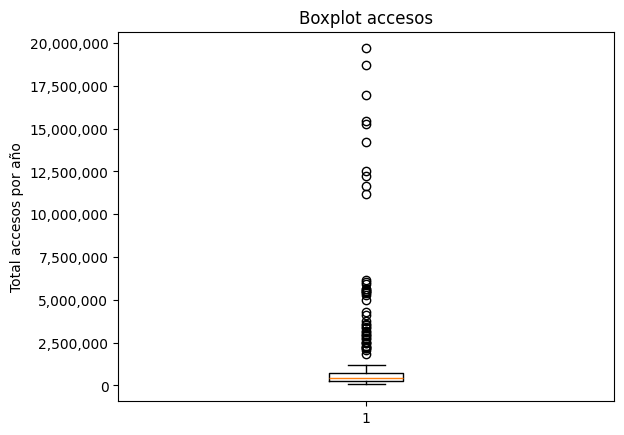

In [52]:
plt.boxplot(data['Total'])
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:,.0f}'))
plt.title('Boxplot accesos')
plt.ylabel('Total accesos por año')
plt.show()

Como podemos ver, si hay bastantes valores atipicos los cuales son de gran tamaño. Lo que debemos hacer a continuación es revisar que filas contienen esos datos para ver si se trata de errores, datos que no son de interés de estudio o datos interesantes que debemos mantener.

Acorde a lo anterior podemos concluir que: 
- la media de nuestra data es 1383424.98
- El valor medio de nuestra data es 428063
- Al tener una desviación estandar de 2990006.43, vemos que esta muy alejada de 1, por lo que podemos decir que nuestros datos están bastantes dispersos lo cual podemos apreciar al ver la cantidad de valores atipicos que tenemos en nuestro Boxplot. 
- el 25% de nuestros datos es menor a 232892.25, el 50% de nuestros datos son menores a 428063 y por último que el 75% de nuestros datos son menores a 716971. 

Lo que haremos ahora es realizar una gráfica de dispersión para poder revisar de cerca que contienen las filas que tienen estos valores atipicos y ver si podemos eliminarlos o no. 

In [53]:
graf_disperción= px.scatter(data, y='Total', width= 1200, height= 350)
graf_disperción.show()

Nuevamente podemos notar que hay valores atipicos, sin embargo, el fin de esta gráfica es saber en que indices están y ver que hay dentro de esas filas, como muestra se tomaran los 5 valores más altos, cuyos indices son: 216,192,168,144 y 120

In [54]:
data.iloc[216]

Año                                     2023
Provincia                       Buenos Aires
ADSL                               1031216.0
Cablemodem                        11109381.0
Fibra óptica                       6721851.0
Wireless                            546777.0
Otros                               277048.0
Total                             19686273.0
Mbps (Media de bajada)               139.965
Accesos por cada 100 hogares          320.27
Name: 216, dtype: object

In [55]:
data.iloc[192]

Año                                     2022
Provincia                       Buenos Aires
ADSL                               1408253.0
Cablemodem                        10964050.0
Fibra óptica                       5576746.0
Wireless                            509124.0
Otros                               280767.0
Total                             18738940.0
Mbps (Media de bajada)                  77.3
Accesos por cada 100 hogares      310.708147
Name: 192, dtype: object

In [56]:
data.iloc[168]

Año                                     2021
Provincia                       Buenos Aires
ADSL                               2244988.0
Cablemodem                        10257877.0
Fibra óptica                       3737407.0
Wireless                            459467.0
Otros                               253380.0
Total                             16953119.0
Mbps (Media de bajada)              55.00194
Accesos por cada 100 hogares       286.45484
Name: 168, dtype: object

In [57]:
data.iloc[144]

Año                                     2020
Provincia                       Buenos Aires
ADSL                               2624090.0
Cablemodem                         9280431.0
Fibra óptica                       2997838.0
Wireless                            364785.0
Otros                               188991.0
Total                             15456135.0
Mbps (Media de bajada)             47.307067
Accesos por cada 100 hogares      266.179423
Name: 144, dtype: object

In [58]:
data.iloc[120]

Año                                     2019
Provincia                       Buenos Aires
ADSL                               4586425.0
Cablemodem                         8437258.0
Fibra óptica                       1813913.0
Wireless                            312790.0
Otros                                98466.0
Total                             15248852.0
Mbps (Media de bajada)              24.64327
Accesos por cada 100 hogares      267.698049
Name: 120, dtype: object

Podemos observar que todos los valores son de la provincia de Buenos Aires pero en diferentes años. Teniendo en cuenta que la provincia de Buenos Aires es de la mas pobladas de Argentina y le siguen Capital Federal, Córdoba, Santa Fe y Mendoza, podría tomarse como que los valores atipicos presentados no son errores sino que estan ligados a el número de habitantes que viven en cada una de las provincias que presentan valores mas altos al de la media o que son mas visitadas por turistas genereando un mayor número de accesos. Teniendo en cuenta lo anterior se decide mantener los valores atipicos.

Para nuestro primer analisis, usaremos el total de accesos por provincia para ver como ha sido el crecimiento anual de cada provincia a lo largo de los años. 

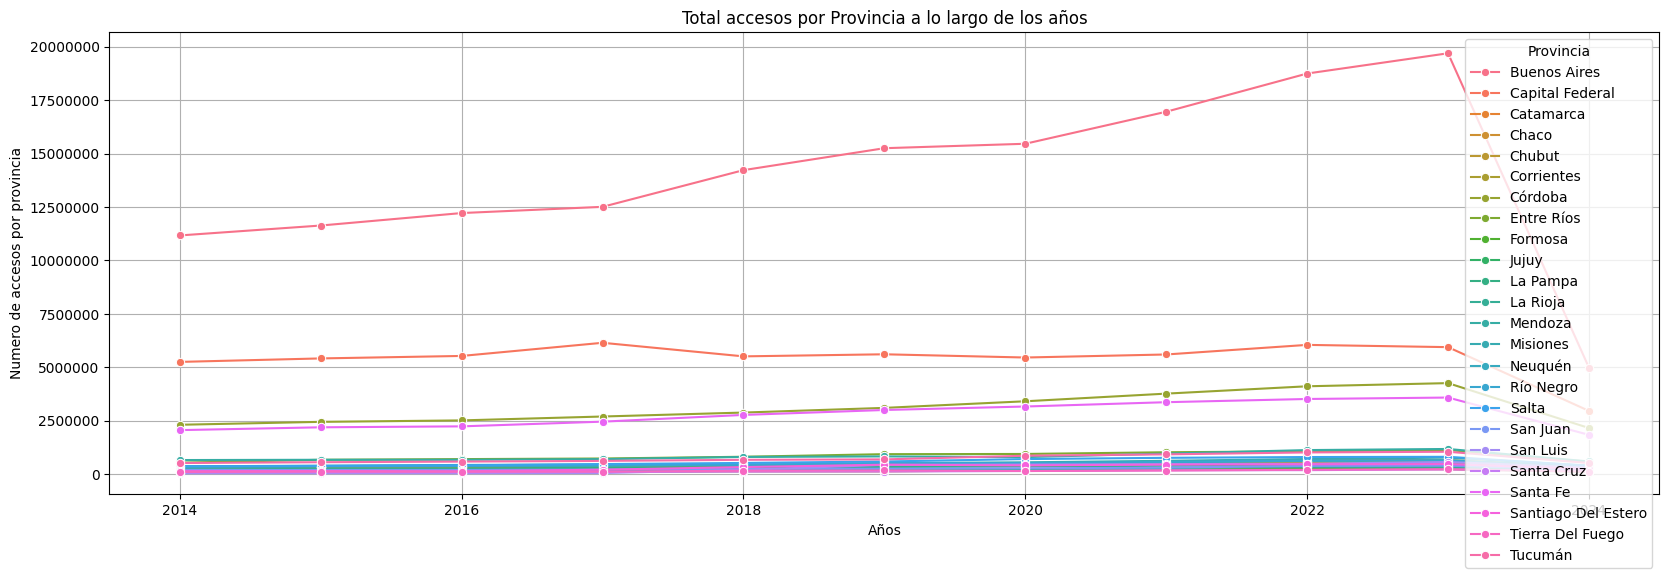

In [59]:
plt.figure(figsize=(20, 6))

sns.lineplot(data=data, x='Año', y='Total', hue='Provincia', marker='o')
plt.legend(title='Provincia', loc='upper right') 
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.title('Total accesos por Provincia a lo largo de los años')
plt.xlabel('Años')
plt.ylabel('Numero de accesos por provincia')
plt.grid(True)
plt.show()

Aqui podemos ver con mas detalle las primeras 5 provincias con mas accesos en el año 2023 y las 5 provincias con menos accesos.

In [60]:
filtro = data[data['Año'] == 2023] 
info_agrupada = filtro.groupby('Provincia')['Total'].sum().reset_index()
provincias = info_agrupada.sort_values(by='Total', ascending=False)
provincias.head()

,Provincia,Total
0,Buenos Aires,19686273.0
1,Capital Federal,5948758.0
6,Córdoba,4266359.0
20,Santa Fe,3591941.0
12,Mendoza,1188068.0


In [61]:
provincias.tail()

,Provincia,Total
11,La Rioja,348799.0
2,Catamarca,293424.0
8,Formosa,244651.0
22,Tierra Del Fuego,236078.0
19,Santa Cruz,233981.0


Según lo que podemos observar en el gráfico: <br> 
- La provincia de Buenos Aires siempre ha tenido un crecimiento mayor al de las otras provincia en total de accesos, siguiendole la Capital federal. Sin embargo se puede observar que la Capital Federal tuvo un decrecimiento de 2017 a 2018 y desde entonces se mantenido bajo, tuvo un ligero crecimiento entre 2020 y 2022, al igual que todas las provincias pero esto puedo deberse al COVID 19 que empezo en el 2020 y termino completamente en 2022, durante este periodo muchos procesos tuvieron que hacerse a través de internet, lo que puede dar como resultaldo un crecimiento en todas las provincias. 

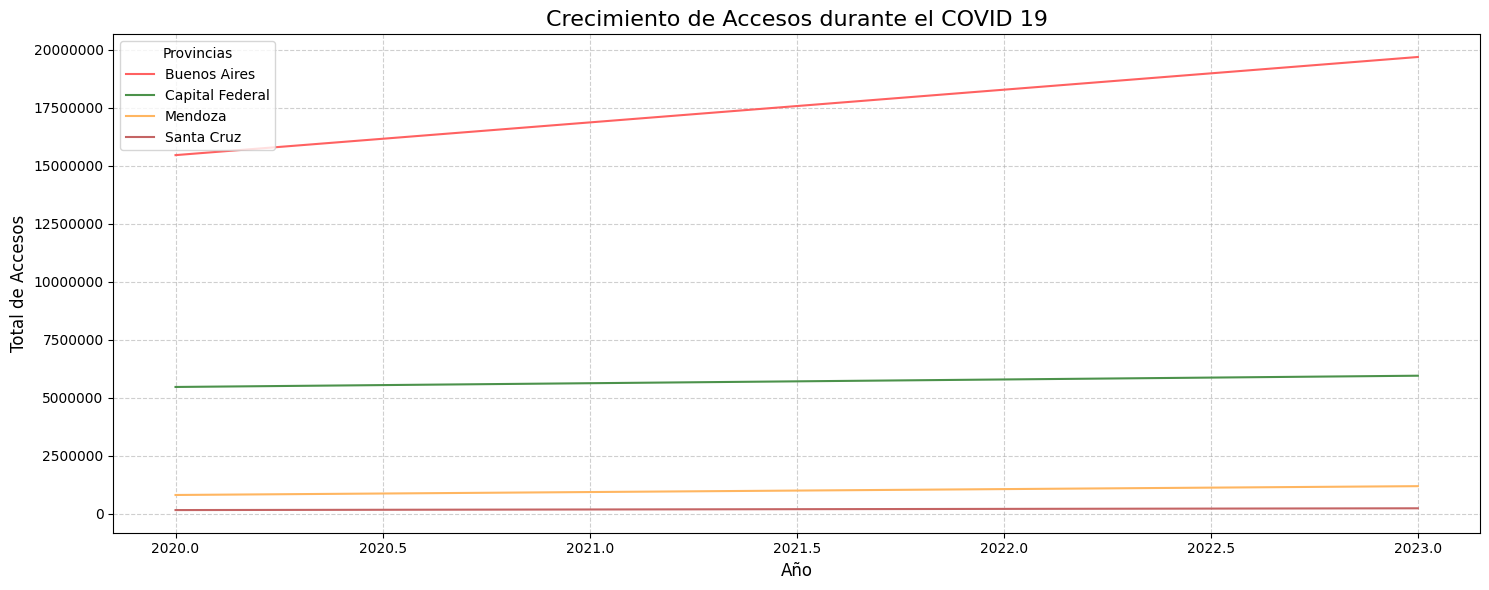

In [62]:
filtro_año_provincia= data[(data['Año'].isin([2020, 2023]))]
provincias = ['Buenos Aires','Capital Federal','Santa Cruz','Mendoza']
filtro_provincias = filtro_año_provincia[filtro_año_provincia['Provincia'].isin(provincias)]
provincias_pivot = filtro_provincias.pivot(index='Año', columns='Provincia', values='Total')
provincias_pivot.plot(kind='line', figsize=(15, 6), marker='', color=['#FF6161', '#4C924B', '#FFB661','#C46464',])
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.title('Crecimiento de Accesos durante el COVID 19', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de Accesos', fontsize=12)
plt.legend(title='Provincias', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


En el gráfico anteior observamos el comportamiento de distintas provincias para ver si hubo un crecimiento en todas durante la época del COVID 19, desde la provincia con menos crecimiento en 2023 Santa Cruz, hasta la de mayor crecimiento Buenos Aires. Como se puede observar en el gráfico, todas tuvieron un crecimiento aunque fuera minimo como en el caso de Santa Cruz. 

Volviendo al gráfico anterior, Capital Federal sigue posicionandose como la segunda provincia con mas accesos pero con la posibilidad de ser superada por Córdoba y Santa Fe en unos años. Tambien podemos observar que el crecimiento de Capital Federal no fue muy marcado en la gráfica de Crecimiento de Accesos durante el COVID 19.

Por otro lado, se puede ver que hay una marcada diferencia entre Buenos aires, Capital Federal, Córdoba y Santa Fe con respecto a las otras provincias que en su mayorial no han alcanzado los 2.500.000 de accesos. <br>
Pueden haber varias razones detrás de ellos: <br>

Si bien se menciono antes Buenos aires, Capital Federal, Córdoba y Santa Fe son de las provincias mas pobladas de Argentina, por lo que tiene sentido que haya un mayor número de accesos. 


Otra razón puede deberse a la calidad del internet en cada provincia, ya que si el internet es rapido puede haber un mayor numero de accesos al día, en cambio si es lento, puede demorarse mucho mas en lograr un primer acceso. Tomemos como ejemplo el 2023 para observar su comportamiento. 

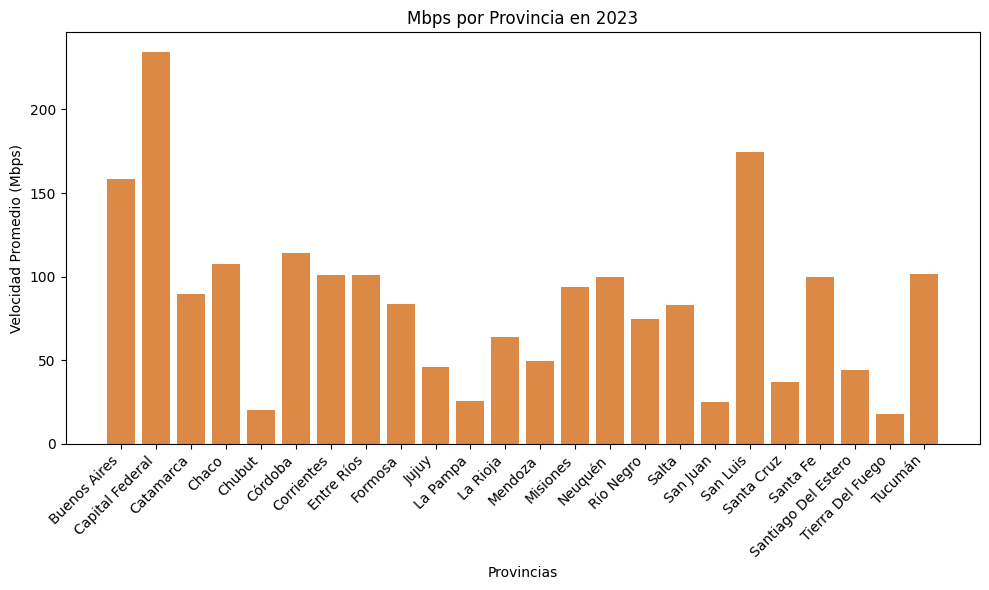

In [63]:
año = 2023
filtro = velocidad_por_prov[velocidad_por_prov['Año'] == año]
plt.figure(figsize=(10, 6))
plt.bar(filtro['Provincia'], filtro['Mbps (Media de bajada)'], color='#DB8944')
plt.title(f'Mbps por Provincia en 2023')
plt.xlabel('Provincias')
plt.ylabel('Velocidad Promedio (Mbps)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

De acuerdo al gráfico, la provincia con internet mas rápido fue Capital Federal, después le siguio Buenos Aires y Córdoba. Algo curioso que se puede ver en el gráfico es que Capital Federal tiene internet mas rápido que Buenos Aires pero no tiene mas accesos y de hecho a medida que ha avanzado el tiempo su crecimiento en accesos no ha sido igual al de Buenos Aires y podría decirse que no ha sido mejor al de Córdoba y Santa Fe. Tambien podemos observar que el internet de San Luis es mejor al de Santa Fe y sin embargo este último tiene mas accesos. Las posibles causas pueden ser su número de habitantes e infraestructura teniendo en cuenta que San Luis es mucho mas rural que Santa Fe. Por otra parte Mendoza no tiene de los mejores internets pero si tiene una gran cantidad de accesos, este fenomeno puede asociarse al hecho de que Mendoza es una de las provincias mas grandes de Argentina.

Una de las razones de la calidad del internet es el tipo de tecnologia que se usa, por eso a continuación evaluaremos que tecnologia fue la mas utilizada por las provincias en 2023 para poder sacar conclusiones respecto a su calidad de mbps. 

In [64]:
def tecnologia_por_año(año:int, tecnologia):
    filtro = data[data['Año'] == año]
    plt.figure(figsize=(7, 4))
    plt.bar(filtro['Provincia'], filtro[tecnologia], color='#FFCE61')
    plt.title(f'Uso de {tecnologia} en {año}')
    plt.xlabel('Provincias')
    plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
    plt.gca().yaxis.get_major_formatter().set_scientific(False)
    plt.ylabel(f'N° de {tecnologia} usado por provincia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Para este análisis tendremos en cuenta a las provincias mas grandes de Argentina a nivel poblacional. Estas son:
1) Buenos aires<br>
2) Capital Federal
3) Cordoba <br>
4) Santa fe <br>
5) Mendoza<br>
6) Tucumán <br>
7) Salta<br>
8) Entre Ríos <br>

Empezaremos con la tecnología ADSL:

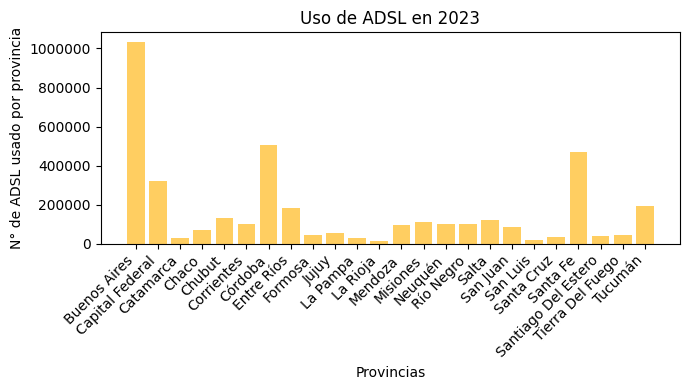

In [65]:
tecnologia_por_año(2023,'ADSL')

En este primer gráfico vemos como ha sido el uso de la tecnología ADSL en 2023 por las provincias. Mostrando que ha sido usado mayor mente en las siguientes provincias: <br>
- Buenos Aires
- Córdoba
- Santa Fe 

Y las provincias que menos la han usado son:
- La Rioja
- San Luis
- Catamarca 

Analizando el gráfico desde las 7 provincias principales podemos observar que el ADSL es bastante usado por Buenos Aires, Córdoba y Santa Fe, sin embargo, Capital Federal, Mendoza, Tucumán, Salta y Entre Rios no tienen niveles tan altos. Esto se debe a que en los últimos años ha aumentado la popularidad de la fibra óptica y el Cable modem, reemplazando el servicio ADLS, sin embargo, apenas se están realizando estos cambios por lo que podría haber una oportunidad de negocio en la comercialización de Fibra óptica teniendo en cuenta el número de accesos de este tecnologia aun no es tan grande.



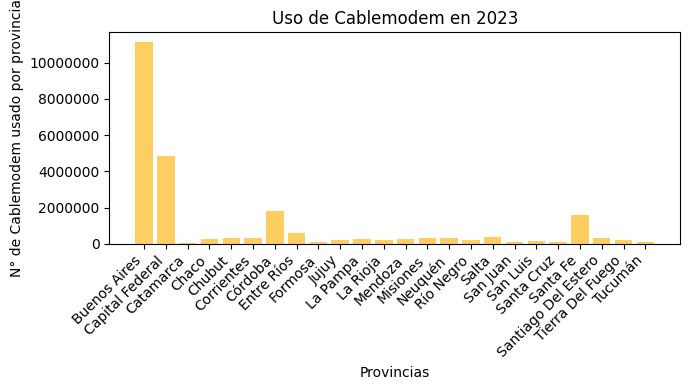

In [66]:
tecnologia_por_año(2023,'Cablemodem')

En este segundo gráfico vemos como ha sido el uso de la tecnología Cablemodem en 2023 por las provincias. Mostrando que ha sido usado mayor mente en las siguientes: <br>
- Buenos Aires
- Capital Federal
- Córdoba 

Y las que menos la han usado son:
- Catamarca
- Formosa
- San Juan
- Santa Cruz
- Tucumán 

Si analizamos el gráfico desde las provincias mas grandes, podemos ver que Buenos Aire, Capital Federal, Córdoba y Santa Fe usan bastante el Cable Modem, ahora, sucede lo mismo que con el ADSL, la fibra óptica se esta volviendo un competidor fuerte para esta tecnología, sin embargo, en algunas zonas rurales el Cable modem tiene ventaja sobre la fibra óptica, por lo que considerar un inversión en esta técnología tambien podría considerarse viable ya que tiene futuro en las zonas rurales, además que como se menciono anteriormente, el ahuje de la fibra óptica apenas esta comenzando y aún tiene mucho mercado por delante, en cambio el Cable modem ya se encuentra establecido. 

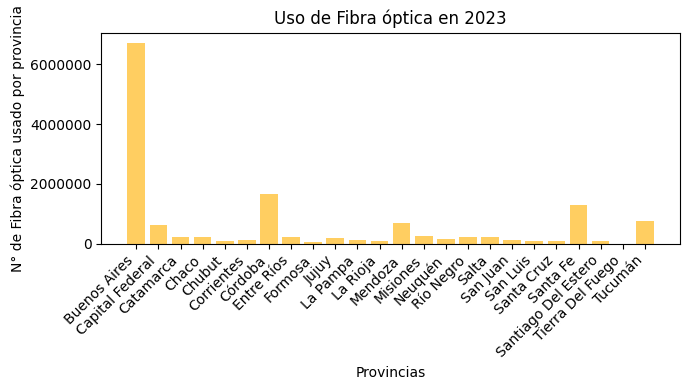

In [67]:
tecnologia_por_año(2023,'Fibra óptica' )

En este tercer gráfico vemos como ha sido el uso de la tecnología de Fibra óptica en 2023 por las provincias. Mostrando que ha sido usado mayor mente en las siguientes: <br>
- Buenos Aires
- Córdoba
- Santa Fe 

Y las que menos la han usado son:
- Tierra de fuego
- Formosa
- Chubut

Teniendo en cuenta el gráfico vemos que a nivel general, la fibra óptica no representa tantos accesos como las otras tecnologias. Ahora teniendo en cuenta que la fibra óptica es conocida por ser uno de los mejores prestadores de internet y su popularidad esta en aumento, estos bajos niveles podrían interpretarse como una oportunidad para invertir en está tecnología y tener un buen nivel de ganancia. 

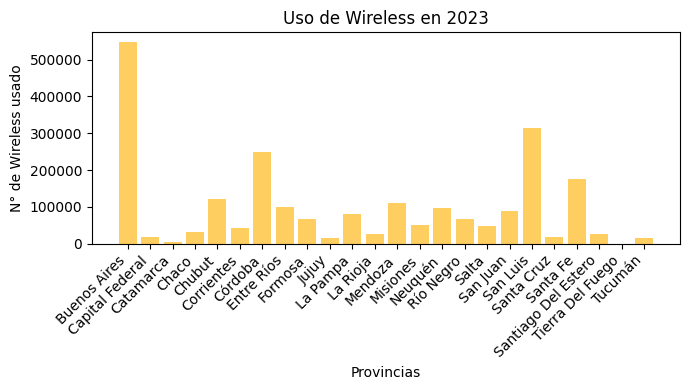

In [ ]:
tecnologia_por_año(2023,'Wireless')

En este cuarto gráfico vemos como ha sido el uso de la tecnología Wireless en 2023 por las provincias. Mostrando que ha sido usado mayor mente en las siguientes: <br>
- Buenos Aires
- San Luis
- Córdoba

Y las que menos la han usado son:
- Tierra del fuego
- Catamarca
- Capital Federal
- Tucumán  

Podemos observar que la tecnología de Wireless es la penultima tecnología con menos accesos, sin embargo, sus niveles en algunas provincias son mas altas que otras tecnologías, sin embargo, no recomendaría invertir en esta tecnología pues la idea enfocarse en las provincias con mas población y ya hay otras tecnologías que tienen mas terreno o lo están ganando. 

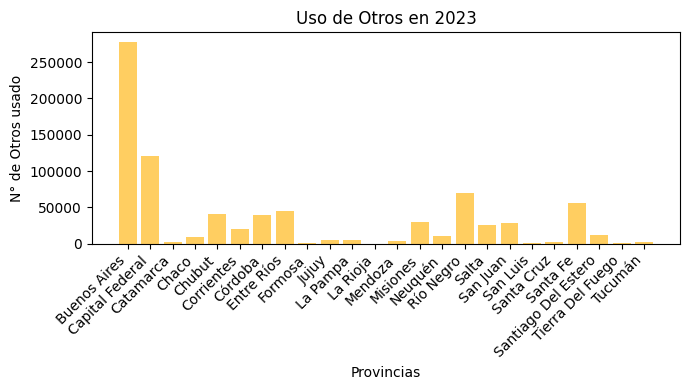

In [ ]:
tecnologia_por_año(2023,'Otros')

En este último gráfico vemos como ha sido el uso de otras tecnologías en 2023 por las provincias. Mostrando que han sido usadas mayor mente en las siguientes: <br>
- Buenos Aires
- Capital Federal
- Rio negro

Y las que menos la han usado son:
- Formosa
- La Rioja
- Tierra del fuego
- San Luis
- Catarmarca

Analisis general: <br>
- Sabemos que la provincia con mejor internet es Capital Federal, teniendo en cuanto los gráficos por tecnologías, las mas usadas por esta provincia son ADLS, Cablemodem y Otras tecnologías que no han sido mencionadas. Un recomendación para la empresa sería investigar que otras tecnologías usa Capital Federal para ver que relación tienen con la calidad de su internet, si son tan influyentes como ADLS y Cablemodem. <br>
Partiendo de lo anterior, Cablemodem no tiene tanta presencia en el resto de provincias, con excepción de Buenos Aires, pero esta ganando terreno en las zonas rurales de algunas provincias lo que podría aumentar su número de consumidores en el futuro.<br> 
Ahora, si la calidad de internet esta asociada a esta tecnología se recomendaría aumentar su comercialización con el fin de revisar si los niveles de la calidad del internet mejoran y el número de accesos aumenta. Para esto se propone un primer KPI donde se aumente su comercialización en un 10% para el próximo trimestre con el fin de ver si la calidad de internet mejora en las otras provincias. 

- Por otra parte nos encontramos con una oportunidad con la Fibra Óptica, ya que su presencia actualmente no es la mas grande pero esta ganando terreno, por lo que ahora sería un momento ideal para invertir en ella, por lo que se propone que para el proximo trimestre se aumente su comercialización en un 20% en las provincias: Buenos Aires, Cordoba ,Santa fe ,Mendoza y Tucumán.

Ahora analizaremos que tan conveniente es invertir en el negocio de internet. Para ello empezaremos con un Scatter Plot para analizar la correlación entre los años que han pasado y el número de accesos por cada 100 hogares. 

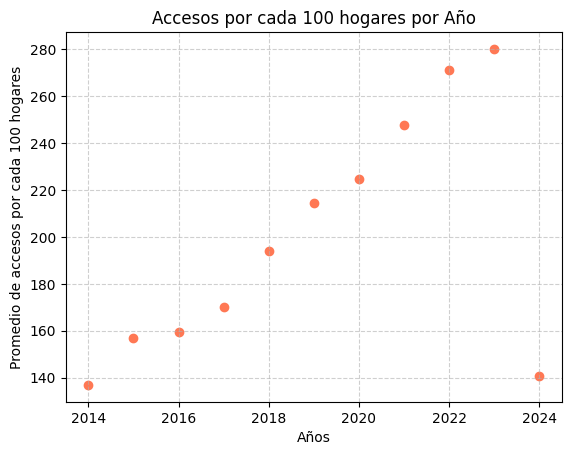

In [ ]:
accesos_hogares_por_año = data.groupby('Año')['Accesos por cada 100 hogares'].mean().reset_index()
plt.scatter(accesos_hogares_por_año['Año'], accesos_hogares_por_año['Accesos por cada 100 hogares'], color='#FF7854')
plt.title('Accesos por cada 100 hogares por Año')
plt.xlabel('Años')
plt.ylabel('Promedio de accesos por cada 100 hogares')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Podemos ver que a diferencia de 2024, el cual no se encuentra completo, hay una correlación positiva entre el tiempo y el promedio de accesos por cada 100 hogares dejandonos ver que hay un crecimiento en el uso de internet de los hogares en cada año. Podemos ver que el único periodo donde no hubo un crecimiento tan marcado fue entre 2015 y 2016. Durante estos periodos hubo unos cambios en la infraestructura de internet que incluyo un aumento en el uso del cable módem, como consecuencia se pueden ver que el crecimiento en los años siguiente fue alto. Sin embargo se observa que entre 2022 y 2023 el crecimiento se da pero ya no es tan grande como el que se dio entre los periodos 2018 a 2019, y entre 2020 a 2022, siendo este último durante la época del COVID. Por lo que se propone un tercer KPI donde se de un aumento del 2% al servicio de internet para el próximo trimestre, en cada 100 hogares por provincia. 

Ya que vemos que el uso de internet en los hogares aumenta con cada año entraremos a ver como se han comportado los ingresos del negocio de internet por año. <br>

Para ello cargaremos la hoja de ingresos de nuestro dataset original.

In [ ]:
ingresos = pd.read_excel(archivo_internet, sheet_name='Ingresos', dtype={'Ingresos (miles de pesos)':str})

Vemos cuales son nuestros datos.

In [ ]:
ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,2,442032166.69,Abr-Jun 2024
1,2024,1,346198986.13,Ene-Mar 2024
2,2023,4,167376014.8,Oct-Dic 2023
3,2023,3,133106593.41,Jul-Sept 2023
4,2023,2,118060280.28,Jun-Mar 2023


Eliminamos las columnas 'Periodo' y 'Trimestre', ya que vamos a hacer un analisis anual y para ello agruparemos los valores de los ingresos.

In [ ]:
ingresos.drop(columns='Periodo', inplace=True)
ingresos.drop(columns='Trimestre', inplace=True)

Para agrupar los ingresos y sumarlos deben ser números, por lo que verificamos que tipo de dato hay en las columnas.

In [ ]:
ingresos.dtypes

Año                           int64
Ingresos (miles de pesos)    object
dtype: object

Pasamos la columna 'Ingresos (miles de pesos)' a float para poder agruparlos.

In [ ]:
ingresos['Ingresos (miles de pesos)'] = ingresos['Ingresos (miles de pesos)'].astype(float)

En los datos hay un error, por equivocación aparece el año 2033, teniendo en cuenta el rango de años que hay en la hoja y que a 2023 le falta el periodo 1, el cual es el que tiene asignado el 2033, decidimos corregir el número y volverlo 2023 para poder agruparlo.

In [ ]:
ingresos['Año'] = ingresos['Año'].replace(2033,2023 )
ingresos = ingresos.groupby(['Año'], as_index=False).mean()
pd.set_option('display.float_format', '{:,.0f}'.format)


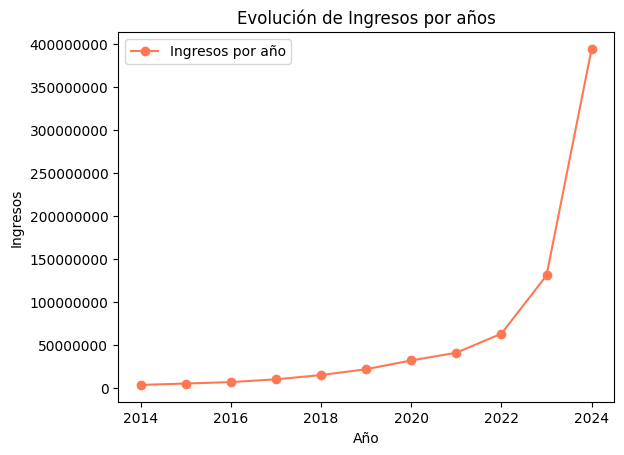

In [ ]:
plt.plot(ingresos['Año'],ingresos['Ingresos (miles de pesos)'], marker='o', color='#FF7854', label='Ingresos por año')
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('Año')
plt.ylabel('Ingresos')
plt.title('Evolución de Ingresos por año')
plt.legend()
plt.show()

Teniendo en cuenta la gráfica anterior muestra que los ingresos por el servicio de internet ha aumentado a medida que pasa el tiempo, mostrando un gran crecimiento en los primeros dos trimestres del año 2024. Y que teniendo en cuenta los escenarios vistos en tecnologías aun se puede generar mas ingresos explorando mercados de tecnologias que han sido exitos en algunas provincias pero en otras están en crecimiento. Ademas que se espera que el promedio de accesos por cada 100 hogares aumente, permitiendo que mas gente obtenga el servicio. 

### CONCLUSIONES Y RECOMENDACIONES

Entre las conclusiones podemos decir lo siguiente:
- El número de habitantes influye en el aumento de accesos, sin embargo, Capital Federal la cual es la segunda provincia mas poblada, no presenta un aumento significativo en los últimos años. 
- La provincias con mejor internet no necesariamente son las mas pobladas ni tampoco son las que tienen mas accesos. 
- Actualmente ADSL y Cable Modem son las técnología mas utilizadas, sin embargo, hay una oportunidad de negocio frente a la implementaciónd de la fibra óptica. 
- Los eventos ocurridos en los periodos de 2016 - 2017 y 2020- 2022 permitieron que hubiera un aumento en la cantidad de accesos, estos eventos son la mejora de la infraestructura y el aumento del cable modem en (2016-2017) y la pandemia de Covid 19 (2020- 2022).
- A pesar de la situación economica de Argentina, el consumo de internet aumenta cada año al igual que sus ingresos en pesos argentinos. 

Entre las recomendaciones estan:

- Invertir en fibra óptica.
- Concentrarse en las cuidades mas pobladas, ya que tienen mejor infraestructura y facilita la instalación de la fibra óptica. 
- Dirigir la inversión de Cable modem a zonas rurales de las provincias mas grandes. 

